In [1]:
import sys
print(sys.executable)
import torch

C:\Users\ejazf\anaconda3\python.exe


In [8]:
import os
from random import choice
import shutil
import glob

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = "C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\images\\test"
valPath = "C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\images\\valid"
crsPath = "C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\train" #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.7
val_ratio = 0.3


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  99
Validation images are :  42


In [9]:
# Define the source and destination paths
crsPath = r"C:\Users\ejazf\Desktop\Thermal Image project"
trainimagePath = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\images\train"
trainlabelPath = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\lables\train"
valimagePath = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\images\valid"
vallabelPath = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\lables\valid"

# Ensure destination directories exist
os.makedirs(trainimagePath, exist_ok=True)
os.makedirs(trainlabelPath, exist_ok=True)
os.makedirs(valimagePath, exist_ok=True)
os.makedirs(vallabelPath, exist_ok=True)

# List of all image files and corresponding label files in the source directory
imgs = [f for f in os.listdir(crsPath) if f.endswith('.jpg') and '_jpg.rf.' in f]
xmls = [f.replace('.jpg', '.txt') for f in imgs]  # Assuming labels follow the same naming convention with .txt extension

countForTrain = len(imgs) // 2  # Example: split half for training
countForVal = len(imgs) - countForTrain  # Rest for validation

# Cycle for training directory
for _ in range(countForTrain):
    fileJpg = choice(imgs)  # Get name of random image from origin dir
    fileXml = fileJpg.replace('.jpg', '.txt')  # Get name of corresponding annotation file

    # Move both files into the train dir
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))

    # Remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

# Cycle for validation directory
for _ in range(countForVal):
    fileJpg = choice(imgs)  # Get name of random image from origin dir
    fileXml = fileJpg.replace('.jpg', '.txt')  # Get name of corresponding annotation file

    # Move both files into the validation dir
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    # Remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

# Define the source and destination directories
crsPath = r"C:\Users\ejazf\Desktop\Thermal Image project\\Practice-1\train"
valPath = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\val"

# Ensure the destination directory (valPath) does not exist before moving
if not os.path.exists(valPath):
    # Move the entire 'train' directory (including any remaining files) to 'valid'
    shutil.move(crsPath, valPath)
    print(f"Moved {crsPath} to {valPath}")
else:
    print(f"Destination directory {valPath} already exists. Cannot move {crsPath}.")

Destination directory C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\val already exists. Cannot move C:\Users\ejazf\Desktop\Thermal Image project\\Practice-1\train.


In [10]:
train:r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\images\train"
val:r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\images\valid"

nc: 2
names: ['dog', 'person']

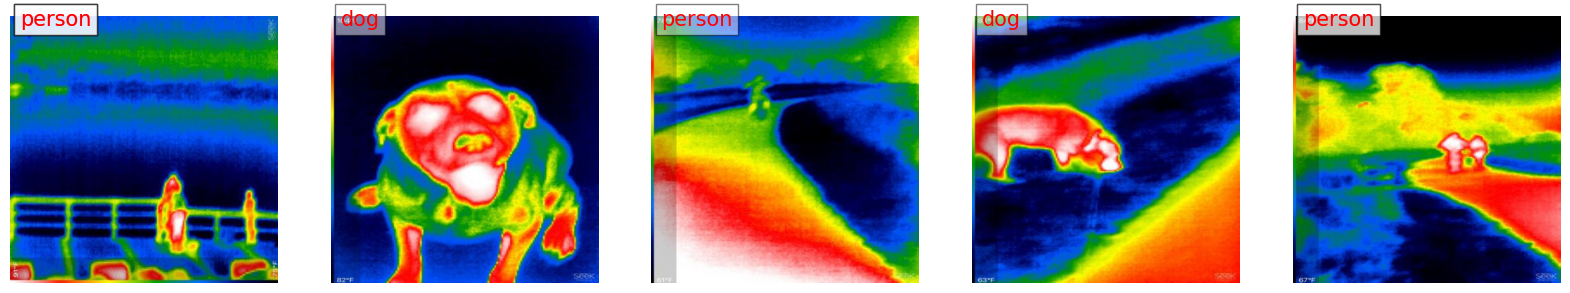

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
image_path = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\images\train"
label_path = r"C:\Users\ejazf\Desktop\Thermal Image project\Practice-1\lables\train"

# Define class names and target classes
class_names = ["dog", "person"]  # Ensure this list matches the class names in your dataset
target_classes = {class_name: index for index, class_name in enumerate(class_names)}

def load_labels(label_file):
    """Load labels from a YOLO label file."""
    with open(label_file, 'r') as file:
        labels = [line.strip().split() for line in file.readlines()]
    return labels

def plot_images_with_labels(images, labels, num_images=5):
    """Plot images and their labels."""
    fig, axs = plt.subplots(1, num_images, figsize=(20, 10))
    for ax, image_file, label_file in zip(axs, images, labels):
        img = Image.open(image_file)
        ax.imshow(img)
        ax.axis('off')

        # Load and display labels
        label_data = load_labels(label_file)
        for label in label_data:
            class_id, x_center, y_center, width, height = map(float, label)
            class_name = list(target_classes.keys())[int(class_id)]

            # Display class names on the plot
            ax.text(15, 15, class_name, color='red', fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

def get_image_label_pairs(target_classes, image_path, label_path):
    """Get top images and labels for target classes."""
    image_files = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
    label_files = {f.replace('.jpg', '.txt') for f in image_files}

    selected_images = []
    selected_labels = []

    for img_file in image_files:
        lbl_file = img_file.replace('.jpg', '.txt')
        if lbl_file in label_files:
            labels = load_labels(os.path.join(label_path, lbl_file))
            for label in labels:
                class_id = int(label[0])
                class_name = list(target_classes.keys())[class_id]
                if class_name in target_classes:
                    selected_images.append(os.path.join(image_path, img_file))
                    selected_labels.append(os.path.join(label_path, lbl_file))
                    break
        if len(selected_images) >= 5:  # Limit to top 5 images
            break

    return selected_images, selected_labels

# Get top 5 images and labels
images, labels = get_image_label_pairs(target_classes, image_path, label_path)

# Plot the images with their labels
plot_images_with_labels(images, labels, num_images=5)

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

In [34]:
!git reset --hard HEAD
!git config --global credential.helper cache
!git config --global credential.helper wincred
!python 'C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\yolov5\\train.py' --img 640 --batch 16 --epochs 50 --data 'data.yaml' --weights yolov5m.pt --cache disk
!python yolov5/train.py --img 640 --batch 16 --epochs 50 --data 'data.yaml' --weights yolov5m.pt --cache disk

HEAD is now at f1edb3c voter admin page fix


python: can't open file "C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\'C:\\Users\\ejazf\\Desktop\\Thermal": [Errno 22] Invalid argument
python: can't open file 'C:\\Users\\ejazf\\Desktop\\Thermal Image project\\Practice-1\\yolov5\\train.py': [Errno 2] No such file or directory
